# DATA MERGING SUBMISSIONS

In [59]:
import pandas as pd
import os

# Liste zum Speichern der einzelnen DataFrames
dfs = []

# Durchlaufe die 12 CSV-Dateien
for i in range(1, 13):
    filename = f"RS_2022-{str(i).zfill(2)}.csv"
    #filename = os.path.join("temp_energy", f"RS_2022-{str(i).zfill(2)}.csv")
    
    if os.path.exists(filename):
        # CSV-Datei einlesen und dem DataFrame-Array hinzufügen
        df = pd.read_csv(filename)
        dfs.append(df)

# Großes DataFrame erstellen
combined_df = pd.concat(dfs)

# CSV-Datei mit dem Namen 'Financials_Submissions.csv' speichern
combined_df.to_csv('Financials_Submissions_new.csv', index=False)


# DATA MERGING COMMENTS

In [128]:
import pandas as pd
import os

# Liste zum Speichern der einzelnen DataFrames
dfs = []

# Durchlaufe die 12 CSV-Dateien
for i in range(1, 13):
    #filename = f"RC_2022-{str(i).zfill(2)}.csv"
    filename = os.path.join("temp_energy", f"RC_2022-{str(i).zfill(2)}.csv")
    
    if os.path.exists(filename):
        # CSV-Datei einlesen und dem DataFrame-Array hinzufügen
        df = pd.read_csv(filename)
        dfs.append(df)

# Großes DataFrame erstellen
combined_df = pd.concat(dfs)

# CSV-Datei mit dem Namen 'Financials_Submissions.csv' speichern
combined_df.to_csv('Energy_Comments.csv', index=False)


# Tech Submissions Cleaner

In [58]:
import pandas as pd

# Liste der Begriffe, nach denen gesucht werden soll
keywords = ["trade ideas", "stock offer", "feed me", "sex", "sexy", "nude", "free stock", "free stocks", "stock chart ideas", "trading ideas", "webull signup", "stock forecast &amp; analysis 💰"
            "awaiting buy signal", "awaiting short signal", "free trial", "awaiting buy signal"]

# DataFrame aus der CSV-Datei erstellen
df = pd.read_csv('Tech_Submissions_new.csv')

# Funktion zum Überprüfen der Texte auf bestimmte Begriffe
def check_text_for_keywords(text):
    if isinstance(text, str):  # Prüfen, ob der Wert ein String ist
        for keyword in keywords:
            if keyword.lower() in text.lower():
                return True
    return False

# Erstellen einer neuen Spalte "Delete" im DataFrame, um anzuzeigen, ob der Text gelöscht werden soll
df['Delete'] = df.apply(lambda row: check_text_for_keywords(row['title']) or check_text_for_keywords(row['selftext']), axis=1)

# Anzeigen der Zeilen, die für das Löschen markiert sind
print("Zum Löschen markierte Zeilen:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[df['Delete']])

# Alle Zeilen, die für das Löschen markiert sind, entfernen
#df = df[~df['Delete']]

# Das aktualisierte DataFrame als "Tech_Submissions.csv" speichern
#df.to_csv('Tech_Submissions_new.csv', index=False)


Zum Löschen markierte Zeilen:
      created_utc                                              title  \
1217   1659353874  $meta stock ideas | awaiting buy signal based ...   
1507   1664438354                          nvidia stock trade signal   

                                               selftext  score  num_comments  \
1217                                                NaN      1             0   
1507  ✨✅ NVIDIA Corporation (#NVDA) Continues moving...      1             0   

                 author             subreddit  Delete  False_Positive  
1217  MudGroundbreaking             UltraAlgo    True           False  
1507       SophiaVardon  forexsignalsservices    True           False  


In [27]:
import pandas as pd
import re

# DataFrame aus der CSV-Datei erstellen
df = pd.read_csv('Tech_Submissions_new.csv')

# Funktion zum Überprüfen der Texte auf das Keyword "v.n"
def check_for_v_n(text):
    if isinstance(text, str):  # Prüfen, ob der Wert ein String ist
        return bool(re.search(r'\bma\.n\b', text.lower()))
    return False

# Erstellen einer neuen Spalte "False_Positive" im DataFrame, um anzuzeigen, ob es sich um einen falsch positiven Fall handelt
df['False_Positive'] = df.apply(lambda row: check_for_v_n(row['title']) or check_for_v_n(row['selftext']), axis=1)

# Anzeigen der Zeilen, die als falsch positiv markiert sind
print("Falsch positive Ergebnisse:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[df['False_Positive']])

# Alle Zeilen, die als falsch positiv markiert sind, entfernen
#df = df[~df['False_Positive']]

# Das aktualisierte DataFrame als "Tech_Submissions.csv" speichern
#df.to_csv('Tech_Submissions_new.csv', index=False)


Falsch positive Ergebnisse:
Empty DataFrame
Columns: [created_utc, title, selftext, score, num_comments, author, subreddit, Delete, False_Positive]
Index: []


# Energy Submissions Cleaner

In [56]:
import pandas as pd

# Liste der Begriffe, nach denen gesucht werden soll
keywords = ["trade ideas", "stock offer", "feed me", "sex", "sexy", "nude", "free stock", "free stocks", "stock chart ideas", "trading ideas", "webull signup", "stock forecast &amp; analysis 💰"
            "awaiting buy signal", "awaiting short signal", "free trial", "awaiting buy signal"]

# DataFrame aus der CSV-Datei erstellen
df = pd.read_csv('Energy_Submissions_new.csv')

# Funktion zum Überprüfen der Texte auf bestimmte Begriffe
def check_text_for_keywords(text):
    if isinstance(text, str):  # Prüfen, ob der Wert ein String ist
        for keyword in keywords:
            if keyword.lower() in text.lower():
                return True
    return False

# Erstellen einer neuen Spalte "Delete" im DataFrame, um anzuzeigen, ob der Text gelöscht werden soll
df['Delete'] = df.apply(lambda row: check_text_for_keywords(row['title']) or check_text_for_keywords(row['selftext']), axis=1)

# Anzeigen der Zeilen, die für das Löschen markiert sind
print("Zum Löschen markierte Zeilen:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[df['Delete']])

# Alle Zeilen, die für das Löschen markiert sind, entfernen
#df = df[~df['Delete']]

# Das aktualisierte DataFrame als "Tech_Submissions.csv" speichern
#df.to_csv('Energy_Submissions_new.csv', index=False)


Zum Löschen markierte Zeilen:
    created_utc                                              title selftext  \
88   1657034766  $slb stock ideas | awaiting buy signal based o...      NaN   

    score  num_comments             author  subreddit  Delete  
88      1             0  MudGroundbreaking  UltraAlgo    True  


# Financials Submission Cleaner

In [64]:
import pandas as pd

# Liste der Begriffe, nach denen gesucht werden soll
keywords = ["trade ideas", "stock offer", "feed me", "sex", "sexy", "nude", "free stock", "free stocks", "stock chart ideas", "trading ideas", "webull signup", "stock forecast &amp; analysis 💰"
            "awaiting buy signal", "awaiting short signal", "free trial", "awaiting buy signal", "stock forecast &amp; analysis 💰"]

# DataFrame aus der CSV-Datei erstellen
df = pd.read_csv('Financials_Submissions_new.csv')

# Funktion zum Überprüfen der Texte auf bestimmte Begriffe
def check_text_for_keywords(text):
    if isinstance(text, str):  # Prüfen, ob der Wert ein String ist
        for keyword in keywords:
            if keyword.lower() in text.lower():
                return True
    return False

# Erstellen einer neuen Spalte "Delete" im DataFrame, um anzuzeigen, ob der Text gelöscht werden soll
df['Delete'] = df.apply(lambda row: check_text_for_keywords(row['title']) or check_text_for_keywords(row['selftext']), axis=1)

# Anzeigen der Zeilen, die für das Löschen markiert sind
print("Zum Löschen markierte Zeilen:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[df['Delete']])

# Alle Zeilen, die für das Löschen markiert sind, entfernen
#df = df[~df['Delete']]

# Das aktualisierte DataFrame als "Tech_Submissions.csv" speichern
#df.to_csv('Financials_Submissions_new.csv', index=False)


Zum Löschen markierte Zeilen:
    created_utc                                  title  \
92   1670481586  💰 axp stock forecast &amp; analysis 💰   
93   1670482034  💰 bac stock forecast &amp; analysis 💰   
94   1670485871  💰 blk stock forecast &amp; analysis 💰   
95   1670488627   💰 bx stock forecast &amp; analysis 💰   
96   1670519844   💰 gs stock forecast &amp; analysis 💰   
97   1670532936  💰 jpm stock forecast &amp; analysis 💰   
98   1670543074   💰 ms stock forecast &amp; analysis 💰   

                                             selftext  score  num_comments  \
92  \n# Like our [AXP](https://tradingjunkie.space...      1             0   
93  \n# Like our [BAC](https://tradingjunkie.space...      1             0   
94  \n# Like our [BLK](https://tradingjunkie.space...      1             0   
95  \n# Like our [BX](https://tradingjunkie.space/...      1             0   
96  \n# Like our [GS](https://tradingjunkie.space/...      1             0   
97  \n# Like our [JPM](https://tradin

In [70]:
import pandas as pd
import re

# DataFrame aus der CSV-Datei erstellen
df = pd.read_csv('Financials_Submissions_new.csv')

# Funktion zum Überprüfen der Texte auf das Keyword "v.n"
def check_for_v_n(text):
    if isinstance(text, str):  # Prüfen, ob der Wert ein String ist
        return bool(re.search(r'\bblk\.n\b', text.lower()))
    return False

# Erstellen einer neuen Spalte "False_Positive" im DataFrame, um anzuzeigen, ob es sich um einen falsch positiven Fall handelt
df['False_Positive'] = df.apply(lambda row: check_for_v_n(row['title']) or check_for_v_n(row['selftext']), axis=1)

# Anzeigen der Zeilen, die als falsch positiv markiert sind
print("Falsch positive Ergebnisse:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[df['False_Positive']])

# Alle Zeilen, die als falsch positiv markiert sind, entfernen
#df = df[~df['False_Positive']]

# Das aktualisierte DataFrame als "Tech_Submissions.csv" speichern
#df.to_csv('Financials_Submissions_new.csv', index=False)


Falsch positive Ergebnisse:
Empty DataFrame
Columns: [created_utc, title, selftext, score, num_comments, author, subreddit, Delete, False_Positive]
Index: []


In [136]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Energy_Comments.csv')  # Adjust the filename or path if needed

# Fill missing values in the "author" column with an empty string
df['author'] = df['author'].fillna('')

# Filter the DataFrame to rows where "bot" is present in the author column (case-insensitive)
bot_rows = df[df['author'].str.contains(r'(?i)bot', regex=True)]

# Create a set of unique bot authors
unique_bot_authors = set(bot_rows['author'])

# Convert the set to a list
bot_authors_list = list(unique_bot_authors)

# Print the list of bot authors
print("Found Bot Authors:")
for author in bot_authors_list:
    print(author)


Found Bot Authors:
EarningsBot


# COMMENTS COUNT DISTRIBUTION

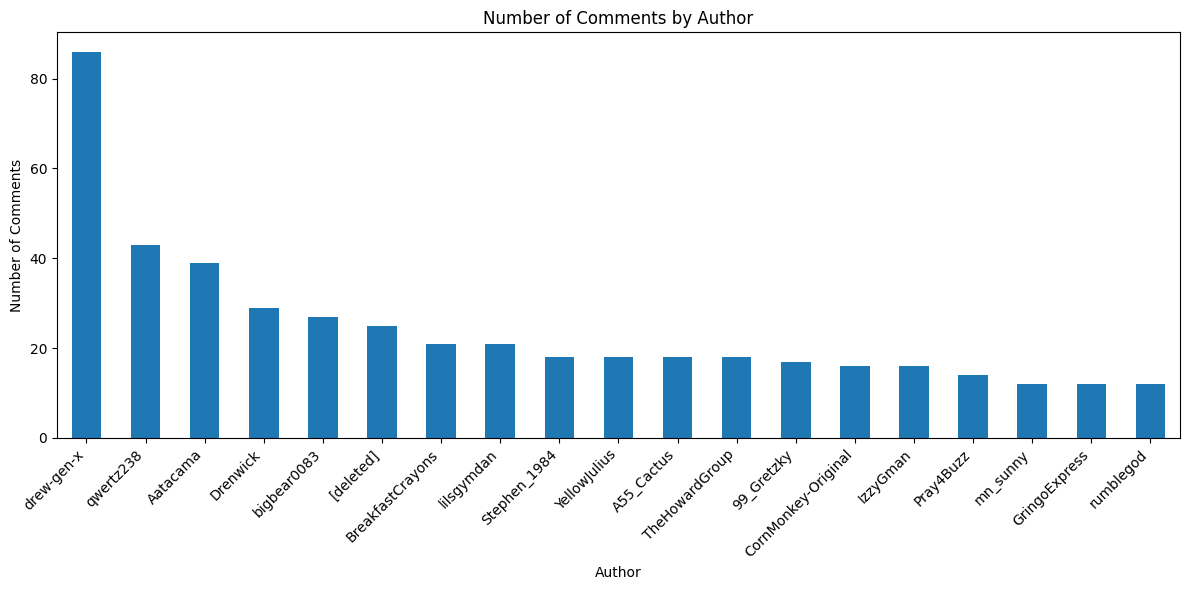

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('Energy_Comments.csv')

# Group the data by author and count the number of comments for each author
author_counts = df['author'].value_counts()

# Filter authors with more than 10 comments in the "body" column
author_counts_filtered = author_counts[author_counts > 10]

# Plot the number of comments by each author
plt.figure(figsize=(12, 6))
author_counts_filtered.plot(kind='bar')
plt.xlabel('Author')
plt.ylabel('Number of Comments')
plt.title('Number of Comments by Author')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Tech Comments Cleaner

In [119]:
import pandas as pd
import re

# Liste der Begriffe, nach denen gesucht werden soll
keywords = ["trade ideas", "stock offer", "feed me", "sex", "sexy", "nude", "free stock", "free stocks", "stock chart ideas", "trading ideas", "webull signup", "stock forecast &amp; analysis 💰",
            "awaiting buy signal", "awaiting short signal", "free trial", "awaiting buy signal", "script", "operator"]

# Liste der Bot-Autoren
bot_authors = ["coinfeeds-bot", "sneakpeekbot", "PardonBot", "MultiSourceNews_Bot", "twitterStatus_Bot", "haikusbot",
               "TG-bot", "transcribot", "TSLA_Bot", "ikickrobots", "ufobot", "KleinUnbottler", "Robot_Embryo", "robotLights",
               "edditbot", "askstockbot", "coverageanalysisbot", "HuzzahBot", "unknown_bot90", "KonekoBot",
               "subredditsummarybot", "EmpresarioLiberalBot", "shittytranslatorbot", "twitterInfo_bot", "plant-id-bot",
               "Shakespeare-Bot", "seenonworldnews_bot", "VisualMod", "winkerdaddy", "5uckmyd1ckb1t4", "PandaOptions", "HSeldon2020", "jasonredit"]

# DataFrame aus der CSV-Datei erstellen
df = pd.read_csv('Tech_Comments.csv')  # Adjust the filename or path if needed

# Funktion zum Überprüfen der Texte auf bestimmte Begriffe
def check_text_for_keywords(row):
    text = row['body']
    if isinstance(text, str):  # Prüfen, ob der Wert ein String ist
        for keyword in keywords:
            if keyword.lower() in text.lower():
                return True
    return False

# Erstellen einer neuen Spalte "Delete" im DataFrame, um anzuzeigen, ob der Text gelöscht werden soll
df['Delete'] = df.apply(check_text_for_keywords, axis=1)

# Erstellen einer neuen Spalte "IsBot" im DataFrame, um anzuzeigen, ob der Autor ein Bot ist
df['IsBot'] = df['author'].str.contains('|'.join(bot_authors), case=False, na=False)

# Fill any NaN values in the 'IsBot' column with False
df['IsBot'] = df['IsBot'].fillna(False)

# Anzeigen der Zeilen, die für das Löschen markiert sind
print("Zum Löschen markierte Zeilen:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[df['Delete']])

# Anzeigen der Zeilen, die einen Bot-Autor enthalten
print("\nBot-Autoren:")
print(df[df['IsBot']]['author'].unique())

# Filtern und das DataFrame als temporäre CSV-Datei speichern
df_filtered = df[~df['IsBot']]
df_filtered.to_csv('Tech_Comments.csv', index=False)

print("Filtering completed.")


Zum Löschen markierte Zeilen:
      created_utc  \
370    1641433201   
527    1641611944   
724    1641915016   
770    1641968967   
772    1641972715   
1001   1642247298   
1045   1642320956   
1219   1642535997   
1234   1642542133   
1373   1642681304   
1491   1642815521   
1495   1642818506   
1987   1643241269   
2000   1643262242   
2012   1643287741   
2183   1643392152   
2397   1643704673   
2428   1643744312   
3407   1644965167   
3873   1645552901   
4110   1646001011   
4159   1646113649   
4160   1646114604   
4490   1646762405   
4600   1647021884   
4614   1647046231   
4840   1647622888   
5011   1648027490   
5102   1648173775   
5116   1648205963   
5181   1648298652   
5343   1648640084   
5594   1649193095   
5721   1649472362   
6003   1650070579   
6061   1650243366   
6077   1650305402   
6554   1650901118   
6769   1651156147   
6982   1651510651   
7109   1651712955   
7110   1651712972   
7315   1652136302   
7374   1652219057   
7820   1652904552   
7831

# FINANCIALS/ ENERGY COMMENT CLEANER

In [135]:
import pandas as pd
import re

# Liste der Begriffe, nach denen gesucht werden soll
keywords = ["trade ideas", "stock offer", "feed me", "sex", "sexy", "nude", "free stock", "free stocks", "stock chart ideas", "trading ideas", "webull signup", "stock forecast &amp; analysis 💰",
            "awaiting buy signal", "awaiting short signal", "free trial", "awaiting buy signal", "script", "operator"]

# Liste der Bot-Autoren
bot_authors = ["coinfeeds-bot", "sneakpeekbot", "PardonBot", "MultiSourceNews_Bot", "twitterStatus_Bot", "haikusbot",
               "TG-bot", "transcribot", "TSLA_Bot", "ikickrobots", "ufobot", "KleinUnbottler", "Robot_Embryo", "robotLights",
               "edditbot", "askstockbot", "coverageanalysisbot", "HuzzahBot", "unknown_bot90", "KonekoBot",
               "subredditsummarybot", "EmpresarioLiberalBot", "shittytranslatorbot", "twitterInfo_bot", "plant-id-bot",
               "Shakespeare-Bot", "seenonworldnews_bot", "VisualMod", "winkerdaddy", "5uckmyd1ckb1t4", "PandaOptions", "HSeldon2020", "jasonredit", "HuzzahBot", "FatFingerHelperBot", "empleadoEstatalBot"]

# DataFrame aus der CSV-Datei erstellen
df = pd.read_csv('Energy_Comments.csv')  # Adjust the filename or path if needed

# Funktion zum Überprüfen der Texte auf bestimmte Begriffe
def check_text_for_keywords(row):
    text = row['body']
    if isinstance(text, str):  # Prüfen, ob der Wert ein String ist
        for keyword in keywords:
            if keyword.lower() in text.lower():
                return True
    return False

# Erstellen einer neuen Spalte "Delete" im DataFrame, um anzuzeigen, ob der Text gelöscht werden soll
df['Delete'] = df.apply(check_text_for_keywords, axis=1)

# Erstellen einer neuen Spalte "IsBot" im DataFrame, um anzuzeigen, ob der Autor ein Bot ist
df['IsBot'] = df['author'].str.contains('|'.join(bot_authors), case=False, na=False)

# Fill any NaN values in the 'IsBot' column with False
df['IsBot'] = df['IsBot'].fillna(False)

# Anzeigen der Zeilen, die für das Löschen markiert sind
print("Zum Löschen markierte Zeilen:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[df['Delete']])

# Anzeigen der Zeilen, die einen Bot-Autor enthalten
print("\nBot-Autoren:")
print(df[df['IsBot']]['author'].unique())

# Filtern und das DataFrame als temporäre CSV-Datei speichern
df_filtered = df[~df['IsBot']]
df_filtered.to_csv('Energy_Comments.csv', index=False)

print("Filtering completed.")


Zum Löschen markierte Zeilen:
     created_utc  \
27    1641530930   
285   1645737973   
320   1646164545   
334   1646249819   
646   1649107892   
835   1651889157   
1413  1661179944   
1484  1661856379   
1627  1665184556   
1628  1665211399   
1637  1665442155   
1639  1665466062   
1703  1666646067   
1765  1667329904   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

# Comments V.N checker

In [108]:
import pandas as pd
import re

# DataFrame aus der CSV-Datei erstellen
df = pd.read_csv('Tech_Comments.csv')

# Funktion zum Überprüfen der Texte auf das Keyword "v.n"
def check_for_v_n(text):
    if isinstance(text, str):  # Prüfen, ob der Wert ein String ist
        return bool(re.search(r'\bma\.n\b', text.lower()))
    return False

# Erstellen einer neuen Spalte "False_Positive" im DataFrame, um anzuzeigen, ob es sich um einen falsch positiven Fall handelt
df['False_Positive'] = df.apply(lambda row: check_for_v_n(row['body']), axis=1)

# Anzeigen der Zeilen, die als falsch positiv markiert sind
print("Falsch positive Ergebnisse:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[df['False_Positive']])

# Alle Zeilen, die als falsch positiv markiert sind, entfernen
#df = df[~df['False_Positive']]

# Das aktualisierte DataFrame als "Tech_Submissions.csv" speichern
#df.to_csv('Tech_Comments.csv', index=False)


Falsch positive Ergebnisse:
Empty DataFrame
Columns: [created_utc, body, score, ups, author, gilded, Delete, IsBot, False_Positive]
Index: []


# COMMENTS SIZE CHECKER

In [6]:
import pandas as pd

# Lade den Dataframe aus der CSV-Datei
df = pd.read_csv('Technology_Comments.csv')

# Definiere die maximale Kontextlänge des Modells
max_context_length = 2000

# Füge eine Spalte hinzu, um die Länge der Kommentare zu speichern
df['comment_length'] = df['body'].apply(lambda x: len(str(x).split()))

# Überprüfe, welche Kommentare die maximale Länge überschreiten
oversized_comments = df[df['comment_length'] > max_context_length]

# Gib die betroffenen Kommentare aus
print(oversized_comments['body'])


Series([], Name: body, dtype: object)


# SENTIMENT FILE CLEANER

In [138]:
import pandas as pd

# CSV-Datei einlesen
df = pd.read_csv('Financials_Comments_Sentiment.csv', delimiter=';')

# Unerwünschten Inhalt bereinigen
valid_sentiments = ['Positive', 'Neutral', 'Negative']
df['GPT Sentiment'] = df['GPT Sentiment'].apply(lambda x: x if x in valid_sentiments else '')

# Dataframe in eine neue CSV-Datei schreiben
df.to_csv('Financials_Comments_Sentiment.csv', index=False, sep=';')


# 0. ROW CHECKER

In [139]:
import pandas as pd

# CSV-Dateien laden
sentiment_df = pd.read_csv('Sentiment_Results_Energy.csv')
portfolio_df = pd.read_csv('Portfolio_Returns_Baseline.csv')

# Anzahl der Zeilen in den Dateien ermitteln
sentiment_rows = len(sentiment_df)
portfolio_rows = len(portfolio_df)

# Ausgabe der Anzahl der Zeilen
print(f"Anzahl der Zeilen in 'Sentiment_Results.csv': {sentiment_rows}")
print(f"Anzahl der Zeilen in 'Portfolio_Returns_Baseline.csv': {portfolio_rows}")


Anzahl der Zeilen in 'Sentiment_Results.csv': 352
Anzahl der Zeilen in 'Portfolio_Returns_Baseline.csv': 251


# 1. SENTIMENT VS PORTFOLIO DATE CHECKER

In [140]:
import pandas as pd

# CSV-Dateien laden
sentiment_df = pd.read_csv('Sentiment_Results_Energy.csv')
portfolio_df = pd.read_csv('Portfolio_Returns_Baseline.csv')

# Datumsdaten extrahieren und in das richtige Format konvertieren
sentiment_dates = pd.to_datetime(sentiment_df['Datum'])
portfolio_dates = pd.to_datetime(portfolio_df['Date'])

# Fehlende Daten finden
missing_dates = sentiment_dates[~sentiment_dates.isin(portfolio_dates)]

# Ausgabe der fehlenden Daten
print(missing_dates)


0     2022-01-02
6     2022-01-08
7     2022-01-09
13    2022-01-15
14    2022-01-16
         ...    
338   2022-12-17
339   2022-12-18
345   2022-12-25
346   2022-12-26
351   2022-12-31
Name: Datum, Length: 107, dtype: datetime64[ns]


# 2. SENTIMENT VS PORTFOLIO DATE ADDER

### Edit Output-File Name to "Long" or "Linear"

In [172]:
import pandas as pd

# CSV-Dateien laden
sentiment_df = pd.read_csv('Sentiment_Results_Financials_Sum.csv')
portfolio_df = pd.read_csv('Portfolio_Returns_Baseline.csv')

# Datumsbereich für das Jahr 2022 erstellen
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')

# Überprüfen, ob Sentiment-Daten für jeden Tag im Jahr 2022 vorhanden sind
missing_dates_sentiment = date_range[~date_range.isin(pd.to_datetime(sentiment_df['Date']))]

# Überprüfen, ob Portfolio-Daten für jeden Tag im Jahr 2022 vorhanden sind
missing_dates_portfolio = date_range[~date_range.isin(pd.to_datetime(portfolio_df['Date']))]

# Leere Zeilen mit den fehlenden Datumsangaben erstellen
missing_rows_sentiment = pd.DataFrame({'Date': missing_dates_sentiment})
missing_rows_portfolio = pd.DataFrame({'Date': missing_dates_portfolio})

# Umwandeln der Datumsspalten in den gleichen Datentyp
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'])

# Sentiment-Datei mit fehlenden Zeilen ergänzen
updated_sentiment_df = pd.concat([sentiment_df, missing_rows_sentiment])
updated_sentiment_df = updated_sentiment_df.sort_values('Date').reset_index(drop=True)

# Portfolio-Datei mit fehlenden Zeilen ergänzen
updated_portfolio_df = pd.concat([portfolio_df, missing_rows_portfolio])
updated_portfolio_df = updated_portfolio_df.sort_values('Date').reset_index(drop=True)

# Aktualisierte DataFrames in neue CSV-Dateien speichern
updated_sentiment_df.to_csv('Sentiment_Results_Financials_Sum.csv', index=False)
#updated_portfolio_df.to_csv('Portfolio_Returns_Long.csv', index=False)


# 3. ROW CHECKER AFTER ADDING

In [174]:
import pandas as pd

# CSV-Dateien laden
sentimentT_df = pd.read_csv('Sentiment_Results_Technology_Sum.csv')
sentimentE_df = pd.read_csv('Sentiment_Results_Energy_Sum.csv')
sentimentF_df = pd.read_csv('Sentiment_Results_Financials_Sum.csv')
portfolio_df = pd.read_csv('Portfolio_Returns_Linear.csv')
portfolioL_df = pd.read_csv('Portfolio_Returns_Long.csv')

# Anzahl der Zeilen in den Dateien ermitteln
sentimentT_rows = len(sentimentT_df)
sentimentE_rows = len(sentimentE_df)
sentimentF_rows = len(sentimentF_df)
portfolio_rows = len(portfolio_df)
portfolioL_rows = len(portfolioL_df)


# Ausgabe der Anzahl der Zeilen
print(f"Anzahl der Zeilen in 'Technology_Sentiment_Results.csv': {sentimentT_rows}")
print(f"Anzahl der Zeilen in 'Energy_Sentiment_Results.csv': {sentimentE_rows}")
print(f"Anzahl der Zeilen in 'Financials_Sentiment_Results.csv': {sentimentF_rows}")
print(f"Anzahl der Zeilen in 'Portfolio_Returns_Linear.csv': {portfolio_rows}")
print(f"Anzahl der Zeilen in 'Portfolio_Returns_Long.csv': {portfolioL_rows}")


Anzahl der Zeilen in 'Technology_Sentiment_Results.csv': 362
Anzahl der Zeilen in 'Energy_Sentiment_Results.csv': 362
Anzahl der Zeilen in 'Financials_Sentiment_Results.csv': 362
Anzahl der Zeilen in 'Portfolio_Returns_Linear.csv': 362
Anzahl der Zeilen in 'Portfolio_Returns_Long.csv': 362


# 4. SENTIMENT VS PORTFOLIO VALUE COPIER

#### Don't forget to delete 01-01 and 01-02 in Sentiment-File to prevent empty data

In [532]:
import pandas as pd

# CSV-Datei einlesen
df = pd.read_csv('Portfolio_Returns_Long.csv')

# Vorwärtsfüllung der fehlenden Werte
df.fillna(method='ffill', inplace=True)

# CSV-Datei mit den ergänzten Daten speichern
df.to_csv('Portfolio_Returns_Long.csv', index=False)


# 4. SENTIMENT VS PORTFOLIO VALUE EXTRAPOLATION 

#### Click multiple times to calculate all gaps

In [228]:
import pandas as pd
import numpy as np

# CSV-Dateien einlesen
portfolio_df = pd.read_csv('Portfolio_Returns_Linear.csv')
sentiment_df = pd.read_csv('Sentiment_Results_Technology_Sum.csv')

# Extrapolation der fehlenden Werte in Sentiment-Datei
sentiment_columns = sentiment_df.columns[1:]  # Spalten mit numerischen Werten
for column in sentiment_columns:
    values = sentiment_df[column].values
    nan_indices = np.isnan(values)  # Indizes der fehlenden Werte
    
    if nan_indices.any():
        first_nan = np.where(nan_indices)[0][0]  # Index des ersten fehlenden Werts
        prev_index = np.where(~nan_indices[:first_nan])[0][-1]  # Index des vorherigen vorhandenen Werts
        next_index = np.where(~nan_indices[first_nan:])[0][0] + first_nan  # Index des nächsten vorhandenen Werts
        
        # Extrapolation der fehlenden Werte linear zwischen den vorhandenen Werten
        prev_value = values[prev_index]
        next_value = values[next_index]
        num_missing_values = next_index - prev_index - 1
        
        slope = (next_value - prev_value) / (num_missing_values + 1)
        for i in range(first_nan, next_index):
            if np.isnan(values[i]):
                values[i] = values[i - 1] + slope

# Extrapolation der fehlenden Werte in Portfolio-Datei
portfolio_columns = portfolio_df.columns[1:]  # Spalten mit numerischen Werten
for column in portfolio_columns:
    values = portfolio_df[column].values
    nan_indices = np.isnan(values)  # Indizes der fehlenden Werte
    
    if nan_indices.any():
        first_nan = np.where(nan_indices)[0][0]  # Index des ersten fehlenden Werts
        prev_index = np.where(~nan_indices[:first_nan])[0][-1]  # Index des vorherigen vorhandenen Werts
        next_index = np.where(~nan_indices[first_nan:])[0][0] + first_nan  # Index des nächsten vorhandenen Werts
        
        # Extrapolation der fehlenden Werte linear zwischen den vorhandenen Werten
        prev_value = values[prev_index]
        next_value = values[next_index]
        num_missing_values = next_index - prev_index - 1
        
        slope = (next_value - prev_value) / (num_missing_values + 1)
        for i in range(first_nan, next_index):
            if np.isnan(values[i]):
                values[i] = values[i - 1] + slope

# CSV-Dateien mit den ergänzten Daten speichern
sentiment_df.to_csv('Sentiment_Results_Technology_Sum.csv', index=False)
#portfolio_df.to_csv('Portfolio_Returns_Linear.csv', index=False)


# AVERAGE SENTIMENT PER DAY

In [155]:
import pandas as pd

# CSV-Datei einlesen
df = pd.read_csv('Sentiment_Results_Technology.csv')

# Das Datum in ein datetime-Format konvertieren
df['Datum'] = pd.to_datetime(df['Datum'])

# Wochentag extrahieren
df['Wochentag'] = df['Datum'].dt.day_name()

# Durchschnittliches Sentiment pro Wochentag berechnen
average_sentiment = df.groupby('Wochentag').mean()

# Ausgabe der durchschnittlichen Sentiments pro Wochentag
print("Durchschnittliches Sentiment pro Wochentag:")
print(average_sentiment[['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']])


Durchschnittliches Sentiment pro Wochentag:
           VADER Sentiment  FinBERT Sentiment  GPT Sentiment
Wochentag                                                   
Friday            0.227484           0.819932       0.060260
Monday            0.231016           0.806355       0.093180
Saturday          0.313148           0.872183       0.095554
Sunday            0.321833           0.874049       0.129885
Thursday          0.223473           0.796206       0.039002
Tuesday           0.250734           0.811685       0.062683
Wednesday         0.228299           0.791801       0.051264


/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_18894/521548272.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_sentiment = df.groupby('Wochentag').mean()


In [156]:
import pandas as pd

# CSV-Datei einlesen
df = pd.read_csv('Sentiment_Results_Financials.csv')

# Das Datum in ein datetime-Format konvertieren
df['Datum'] = pd.to_datetime(df['Datum'])

# Wochentag extrahieren
df['Wochentag'] = df['Datum'].dt.day_name()

# Durchschnittliches Sentiment pro Wochentag berechnen
average_sentiment = df.groupby('Wochentag').mean()

# Ausgabe der durchschnittlichen Sentiments pro Wochentag
print("Durchschnittliches Sentiment pro Wochentag:")
print(average_sentiment[['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']])


Durchschnittliches Sentiment pro Wochentag:
           VADER Sentiment  FinBERT Sentiment  GPT Sentiment
Wochentag                                                   
Friday            0.112837           0.794771      -0.016101
Monday            0.135939           0.780011       0.029511
Saturday          0.229015           0.802660      -0.026456
Sunday            0.273096           0.760330       0.123796
Thursday          0.282983           0.854825       0.060423
Tuesday           0.254980           0.748658       0.080037
Wednesday         0.218309           0.795953      -0.006372


/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_18894/3627019080.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_sentiment = df.groupby('Wochentag').mean()


In [163]:
import pandas as pd

# CSV-Datei einlesen
df = pd.read_csv('Sentiment_Results_Energy.csv')

# Das Datum in ein datetime-Format konvertieren
df['Datum'] = pd.to_datetime(df['Datum'])

# Wochentag extrahieren
df['Wochentag'] = df['Datum'].dt.day_name()

# Durchschnittliches Sentiment pro Wochentag berechnen
average_sentiment = df.groupby('Wochentag').mean()

# Ausgabe der durchschnittlichen Sentiments pro Wochentag
print("Durchschnittliches Sentiment pro Wochentag:")
print(average_sentiment[['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']])


Durchschnittliches Sentiment pro Wochentag:
           VADER Sentiment  FinBERT Sentiment  GPT Sentiment
Wochentag                                                   
Friday            0.266263           0.727176       0.219335
Monday            0.194056           0.792116       0.211527
Saturday          0.382483           0.807823       0.299320
Sunday            0.425421           0.846938       0.319021
Thursday          0.177062           0.789268       0.198846
Tuesday           0.247425           0.792960       0.235144
Wednesday         0.363980           0.830645       0.141425


/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_18894/3704977670.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_sentiment = df.groupby('Wochentag').mean()


/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_18894/2576885861.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.groupby('Wochentag').mean()
/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_18894/2576885861.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.groupby('Wochentag').mean()
/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_18894/2576885861.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns 

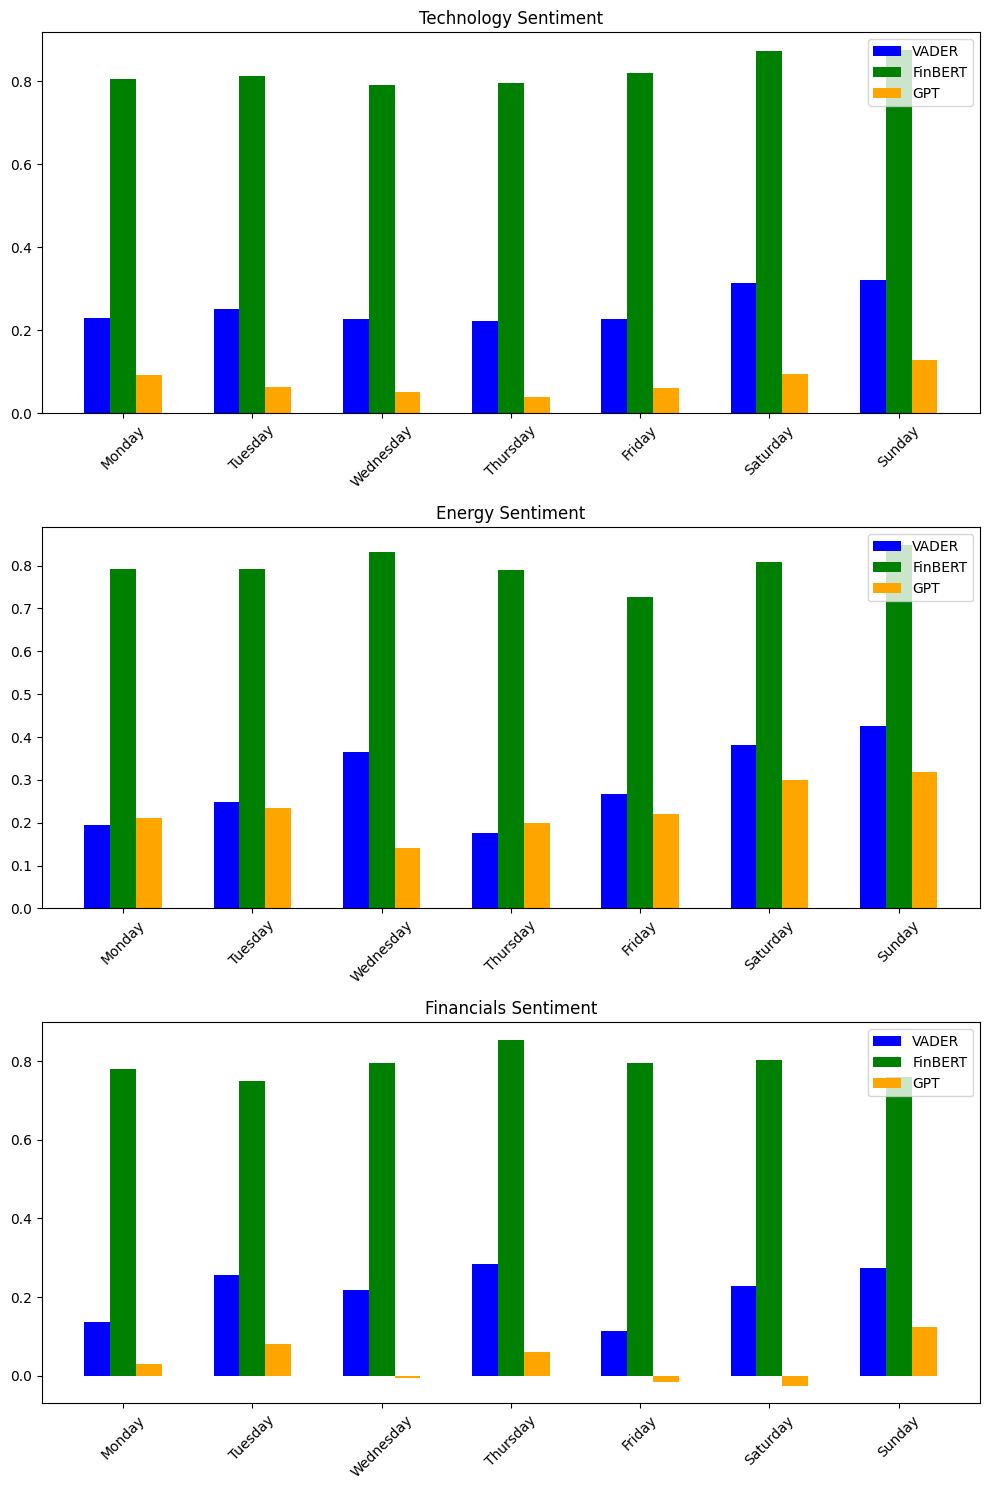

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load data for each industry into separate DataFrames
df_technology = pd.read_csv('Sentiment_Results_Technology.csv')
df_energy = pd.read_csv('Sentiment_Results_Energy.csv')
df_financials = pd.read_csv('Sentiment_Results_Financials.csv')

# Function to calculate average sentiment per weekday
def calculate_average_sentiment(df):
    df['Datum'] = pd.to_datetime(df['Datum'])
    df['Wochentag'] = df['Datum'].dt.day_name()
    return df.groupby('Wochentag').mean()

# Calculate average sentiment for each industry
average_sentiment_technology = calculate_average_sentiment(df_technology)
average_sentiment_energy = calculate_average_sentiment(df_energy)
average_sentiment_financials = calculate_average_sentiment(df_financials)

# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the DataFrames using the specified weekday_order
average_sentiment_technology = average_sentiment_technology.reindex(weekday_order)
average_sentiment_energy = average_sentiment_energy.reindex(weekday_order)
average_sentiment_financials = average_sentiment_financials.reindex(weekday_order)

# Create a bar chart with three subplots for each industry
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot for Technology
bar_width = 0.2
x = range(len(average_sentiment_technology))

axs[0].bar(x, average_sentiment_technology['VADER Sentiment'], width=bar_width, color='blue', label='VADER')
axs[0].bar([i + bar_width for i in x], average_sentiment_technology['FinBERT Sentiment'], width=bar_width, color='green', label='FinBERT')
axs[0].bar([i + 2 * bar_width for i in x], average_sentiment_technology['GPT Sentiment'], width=bar_width, color='orange', label='GPT')

axs[0].set_title('Technology Sentiment')
axs[0].set_xticks([i + bar_width for i in x])
axs[0].set_xticklabels(weekday_order, rotation=45)
axs[0].legend()

# Plot for Energy
x = range(len(average_sentiment_energy))

axs[1].bar(x, average_sentiment_energy['VADER Sentiment'], width=bar_width, color='blue', label='VADER')
axs[1].bar([i + bar_width for i in x], average_sentiment_energy['FinBERT Sentiment'], width=bar_width, color='green', label='FinBERT')
axs[1].bar([i + 2 * bar_width for i in x], average_sentiment_energy['GPT Sentiment'], width=bar_width, color='orange', label='GPT')

axs[1].set_title('Energy Sentiment')
axs[1].set_xticks([i + bar_width for i in x])
axs[1].set_xticklabels(weekday_order, rotation=45)
axs[1].legend()

# Plot for Financials
x = range(len(average_sentiment_financials))

axs[2].bar(x, average_sentiment_financials['VADER Sentiment'], width=bar_width, color='blue', label='VADER')
axs[2].bar([i + bar_width for i in x], average_sentiment_financials['FinBERT Sentiment'], width=bar_width, color='green', label='FinBERT')
axs[2].bar([i + 2 * bar_width for i in x], average_sentiment_financials['GPT Sentiment'], width=bar_width, color='orange', label='GPT')

axs[2].set_title('Financials Sentiment')
axs[2].set_xticks([i + bar_width for i in x])
axs[2].set_xticklabels(weekday_order, rotation=45)
axs[2].legend()

# Adjust layout and save the plot
plt.tight_layout()

# Define the path for saving the graphic
save_path = "/Users/philippsbresny/Library/CloudStorage/OneDrive-Persönlich/VSC/Lazarus_Project/Graphics/Sentiment_Distribution_by_Day.png"

# Save the plot to the specified path
plt.savefig(save_path)

# Show the plot
plt.show()
